# Gradient boosted trees for regression

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

First, we generate some (noisy) data on which to do regression.

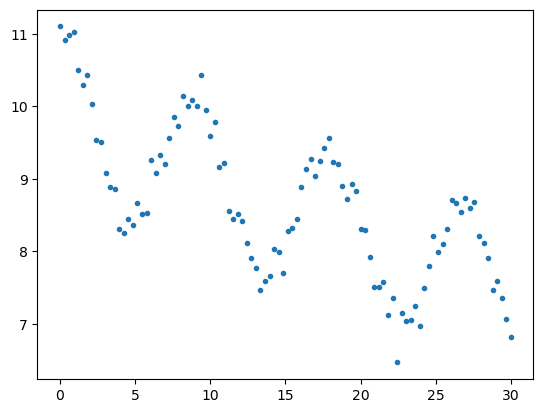

In [4]:
np.random.seed(42)
X = np.linspace(0,30,100)
y = np.cos(0.7*X)+10*np.exp(-0.01*X)+np.random.normal(0,.2,100) #generating some noisy data

plt.plot(X, y,'.')

We split the data into a training and a test set.

In [6]:
X = X.reshape(-1, 1)
y = np.ravel(y) #reshape arrays to make sklearn happy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Here, we train and plot a sequence of gradient boosted trees, using between 1 and 15 trees. Notice how using one tree severely underfits the data, while using too many trees lead to overfitting. Somewhere in between, we have a decent model.

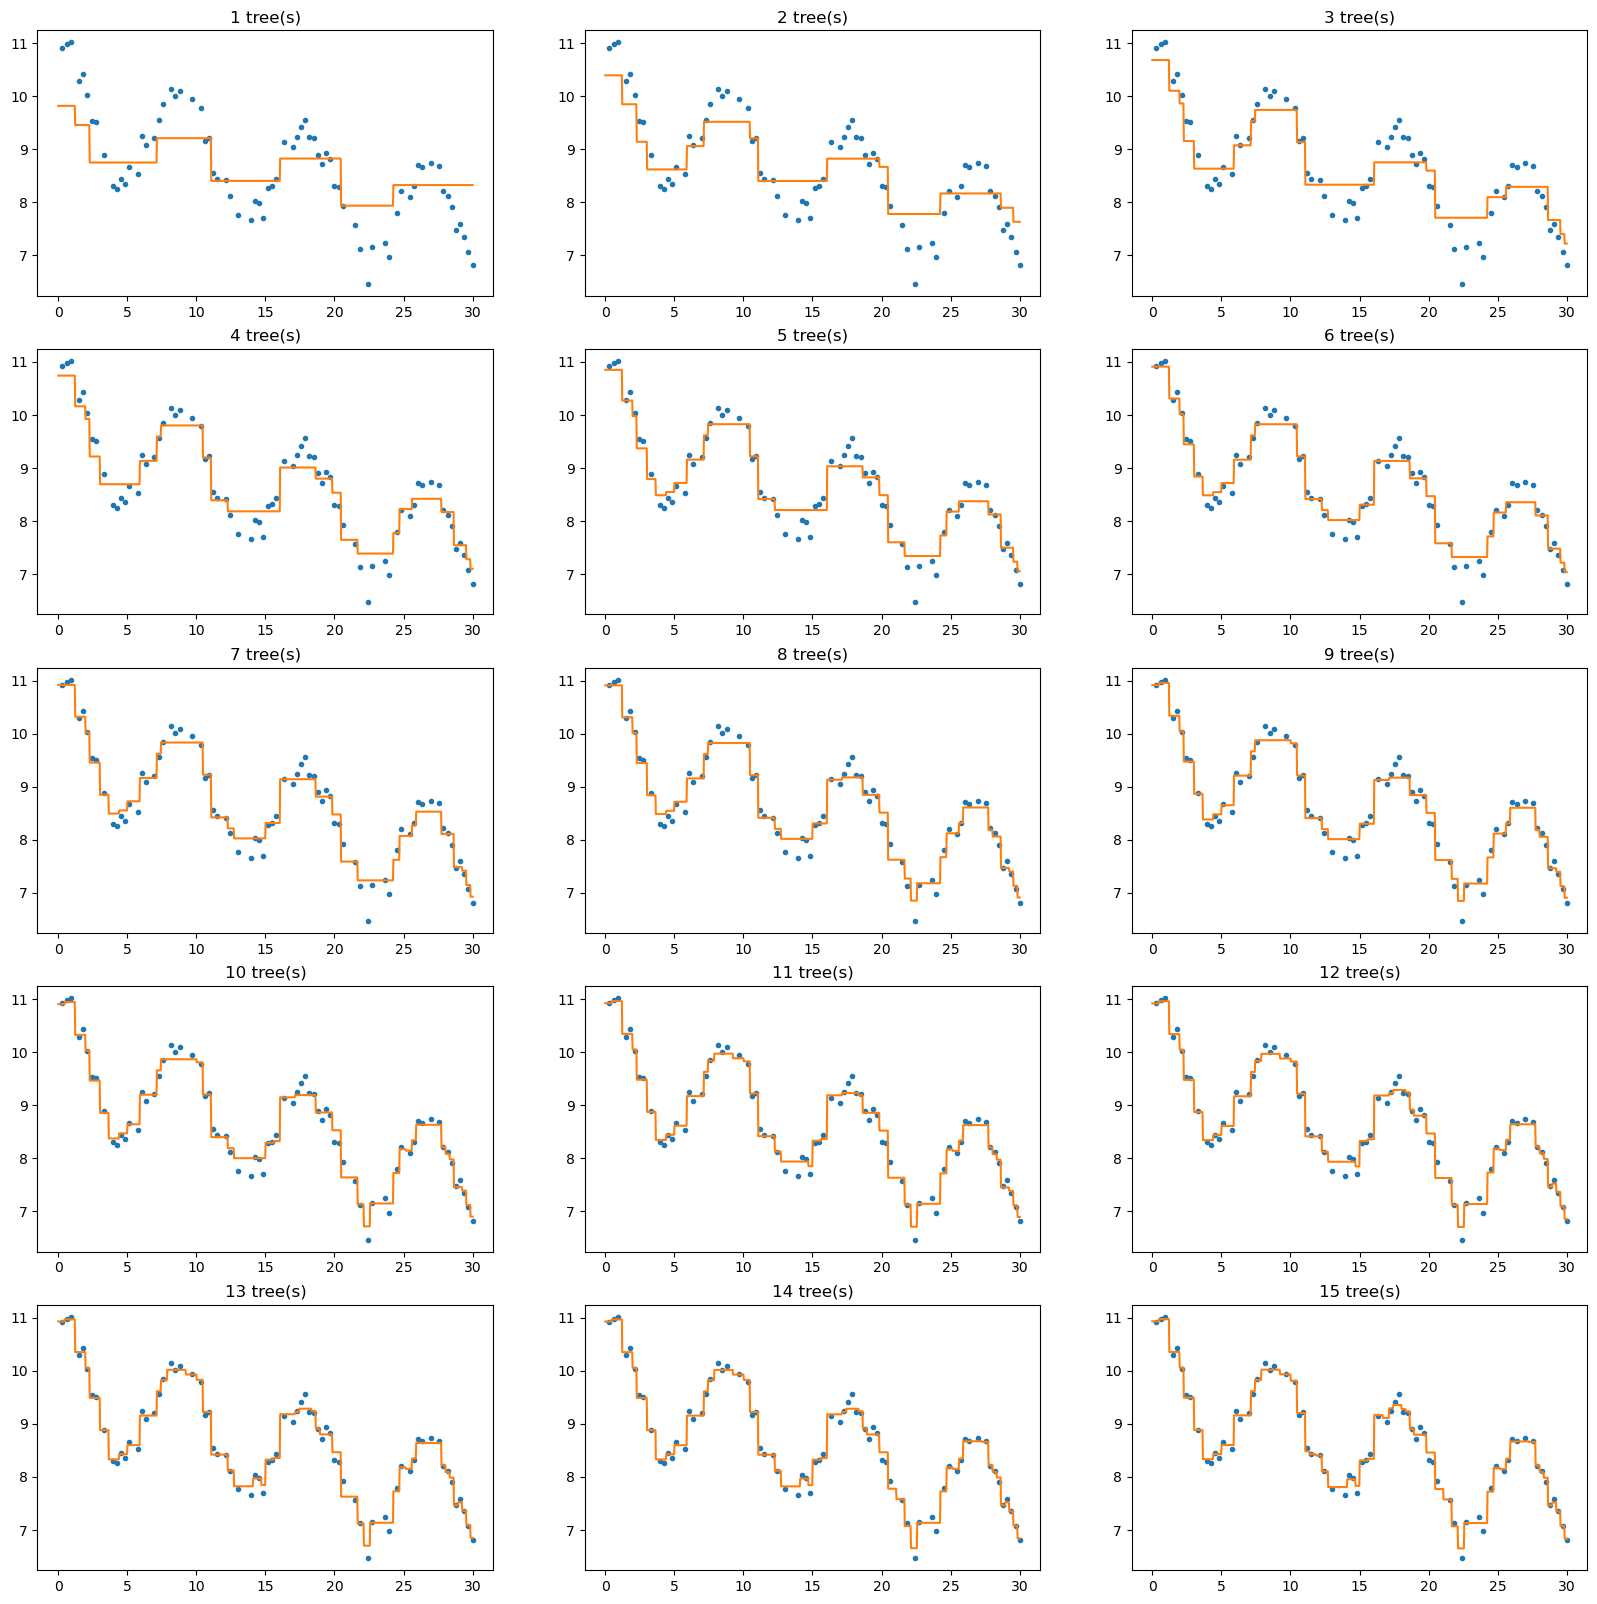

In [8]:
X_plot = np.linspace(0,30,1000)
X_plot = X_plot.reshape(-1, 1)

a = 5
b = 3
train_error = np.zeros([a*b])
test_error = np.zeros([a*b])
gbt = [None for i in range(a*b)]

fig, axes = plt.subplots(a,b, figsize = (20,20))
for i, ax in enumerate(zip(axes.ravel())):
    gbt[i] = GradientBoostingRegressor(random_state=42, n_estimators=i+1, max_depth=3, learning_rate=0.5)
    gbt[i].fit(X_train, y_train)

    train_error[i] = MSE(y_true = y_train, y_pred = gbt[i].predict(X_train))
    test_error[i] = MSE(y_true = y_test, y_pred = gbt[i].predict(X_test))
    
    ax[0].set_title("{} tree(s)".format(i+1))
    
    ax[0].plot(X_train,y_train,'.')
    ax[0].plot(X_plot,gbt[i].predict(X_plot),'-') #plot the actual trees

The way in which the algorithm works is by fitting tree n+1 to the _residuals_ of tree n, and then we add this "residual-tree" to the previous tree. Here, we plot the residuals and the "residual trees".

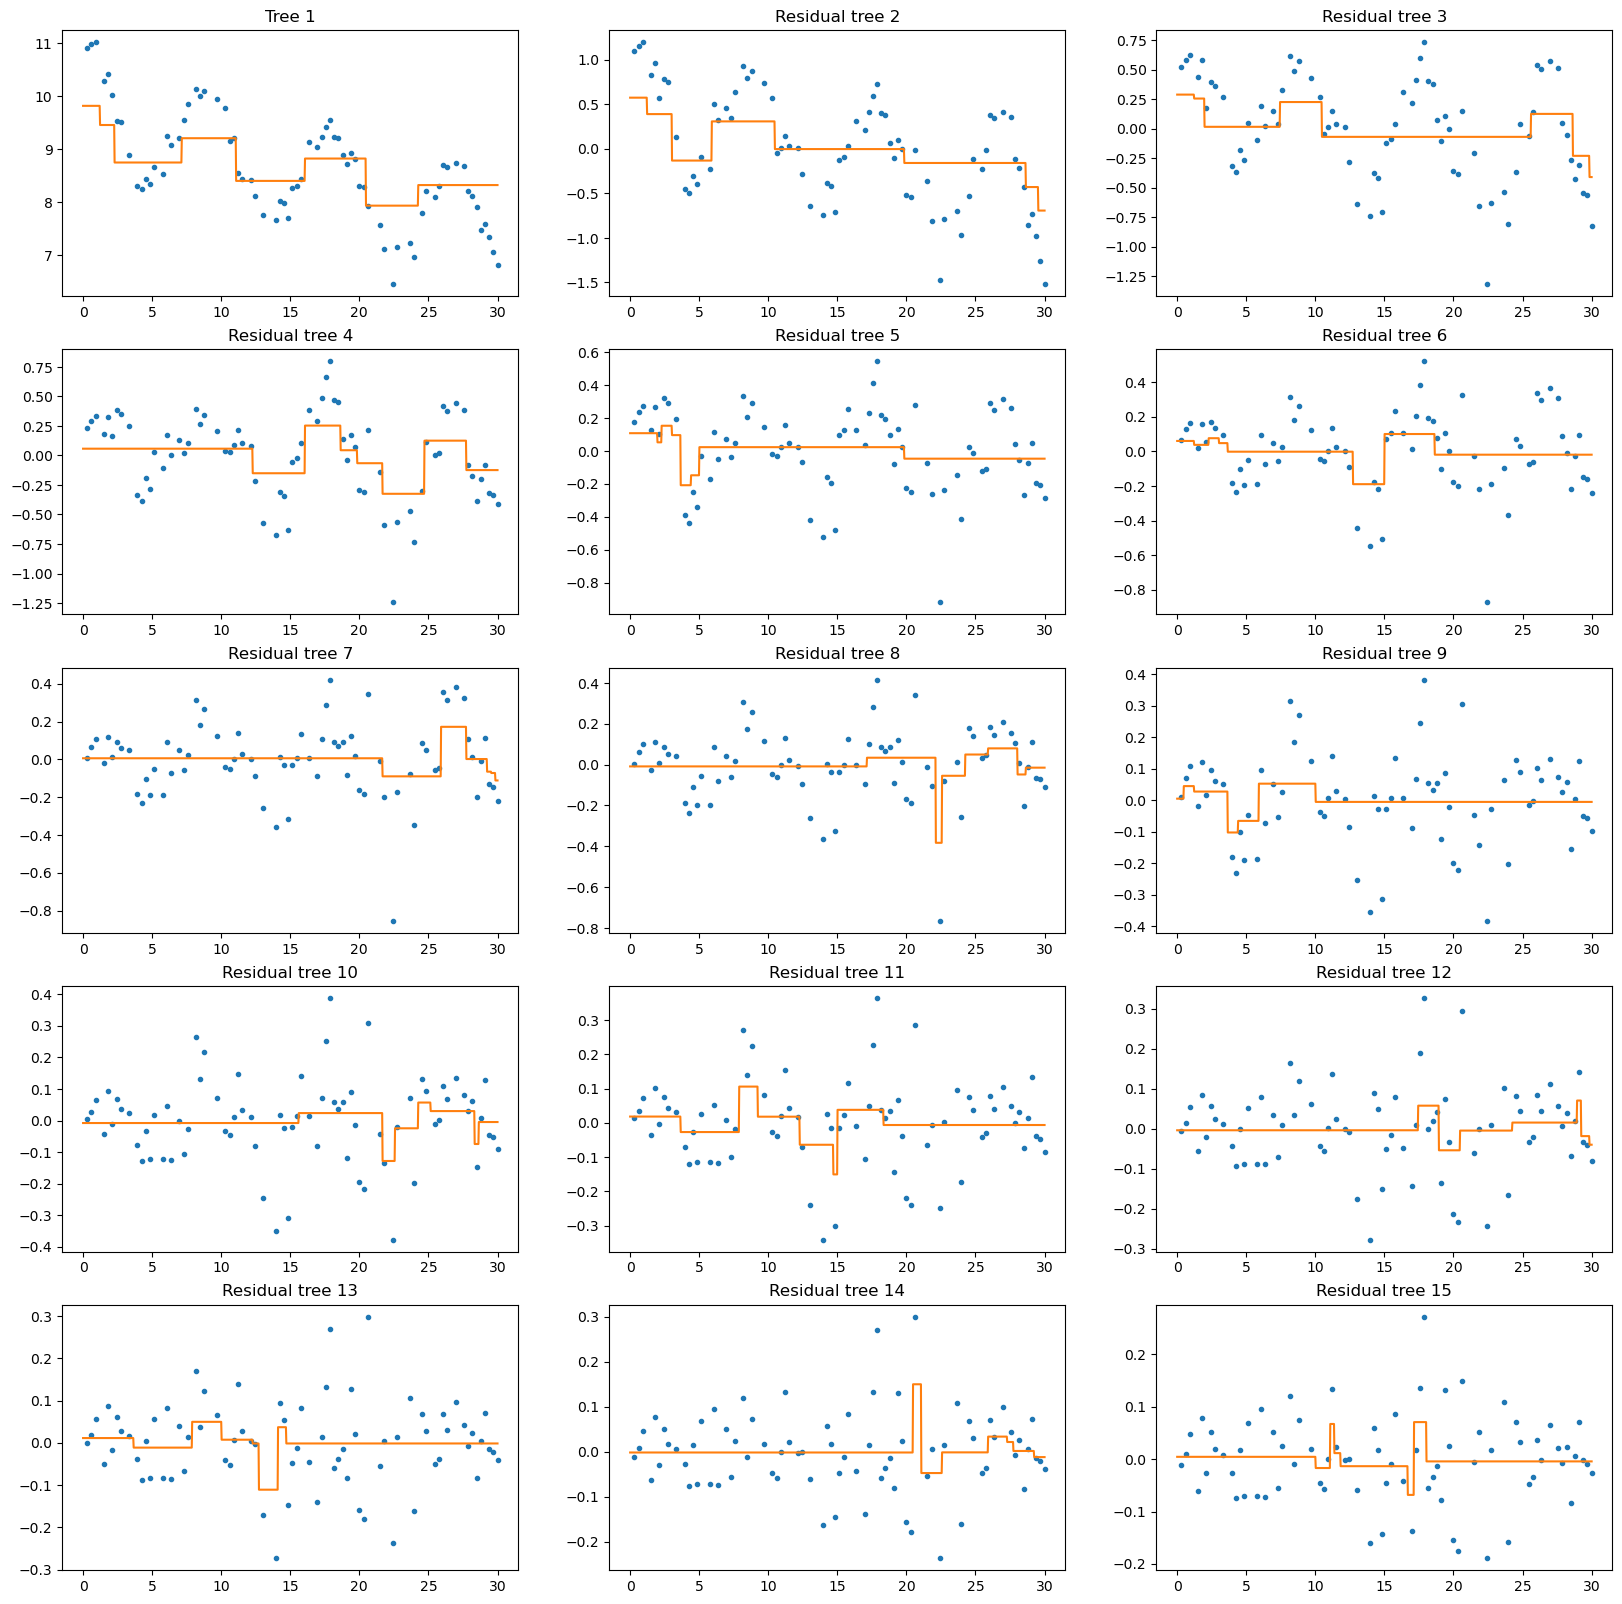

In [10]:
fig, axes = plt.subplots(a,b, figsize = (20,20))
for i, ax in enumerate(zip(axes.ravel())):
    if i == 0:
        ax[0].plot(X_train,y_train,'.')
        ax[0].plot(X_plot,gbt[i].predict(X_plot),'-')
        ax[0].set_title("Tree {}".format(i+1))
    else:
        ax[0].plot(X_train,y_train - gbt[i-1].predict(X_train),'.')
        ax[0].plot(X_plot,gbt[i].predict(X_plot) - gbt[i-1].predict(X_plot),'-')
        ax[0].set_title('Residual tree {}'.format(i+1))

Plot train and test error as a function of the number of trees.

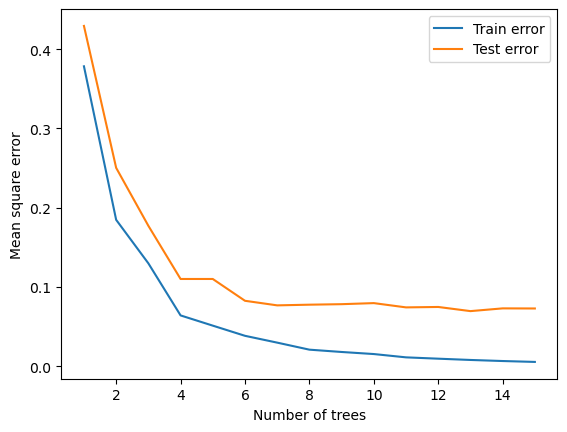

In [12]:
n_trees = range(1,a*b+1)
plt.plot(n_trees,train_error,'-', label = "Train error")
plt.plot(n_trees,test_error,'-', label = "Test error")
plt.xlabel("Number of trees")
plt.ylabel("Mean square error")
plt.legend()